In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as mp
%matplotlib inline
import seaborn as sb


In [68]:
#read the excel file
df=pd.read_excel(r"C:\Users\MUSKAN\OneDrive\Documents\sales.xlsx")

In [69]:
#display 10 rows of the dataframe
df.head(10)

,Order-ID,Store-ID,Customer-ID,Payment-Method,Invoice-Value,Order-Date,Customer address,Membership date,Managers,Clusters,zip codes,Column1
0,97612110049P0057110032434664020,97612110049,P0057110032,Credit Card,656,2019-01-01,Preet Vihar,2016-06-04,Saanvi Rawat,2,110052,2019
1,18563110017S0049110017434909927,18563110017,S0049110017,UPI,378,2019-01-25,Saket,2019-01-25,Pranav Iyer,5,110017,2019
2,69885110036T0066110026438482406,69885110036,T0066110026,Debit Card,872,2020-01-18,Tilak Nagar,2014-07-09,Shruti Trivedi,5,110051,2020
3,67709110046R0080110027441971644,67709110046,R0080110027,UPI,233,2021-01-01,Rajouri Garden,1998-01-15,Vivaan Jain,6,110022,2021
4,62475110033D0070110022453217243,62475110033,D0070110022,Credit Card,741,2024-01-30,Dwarka,2009-11-28,Natasha Sharma,5,110029,2024
5,32639110005K0080110019453206969,32639110005,K0080110019,Debit Card,563,2024-01-29,Kailash Colony,1994-11-22,Siddharth Verma,7,110028,2024
6,99146110018S0024110030453165054,99146110018,S0024110030,UPI,750,2024-01-25,Safdarjung Development Area,2019-09-21,Anika Khurana,2,110062,2024
7,90617110034B0017110006435224540,90617110034,B0017110006,COD,850,2019-02-26,Bara Hindu Rao,2019-02-10,Ananya Verma,5,110041,2019
8,56502110006G0005110046449624866,56502110006,G0005110046,Credit Card,33,2023-02-05,Ghazipur,2018-01-14,Vedant Saxena,4,110060,2023
9,80715110044C0116110003449615128,80715110044,C0116110003,Debit Card,418,2023-02-04,Civil Lines,2000-10-30,Arjun Singh,4,110032,2023


In [70]:
#convert order-date to datetime
df['Order-Date']=pd.to_datetime(df['Order-Date'])

#extract year and month from order_date
df['yearmonth']=df['Order-Date'].dt.to_period('M')

#sum of invoice value according to the months
monthly_sales=df.groupby('yearmonth')['Invoice-Value'].sum()

#count of number of orderID in each month
monthly_orders=df.groupby('yearmonth')['Order-ID'].count()

print(monthly_sales,monthly_orders)

yearmonth
2019-01    2868689
2019-02    2502588
2019-03    2869560
2019-04    2854519
2019-05    2938900
            ...   
2023-09    3955876
2023-10    4152904
2023-11    4055310
2023-12    4252535
2024-01    4152176
Freq: M, Name: Invoice-Value, Length: 61, dtype: int64 yearmonth
2019-01    5720
2019-02    4979
2019-03    5776
2019-04    5584
2019-05    5782
           ... 
2023-09    7854
2023-10    8238
2023-11    7993
2023-12    8308
2024-01    8262
Freq: M, Name: Order-ID, Length: 61, dtype: int64


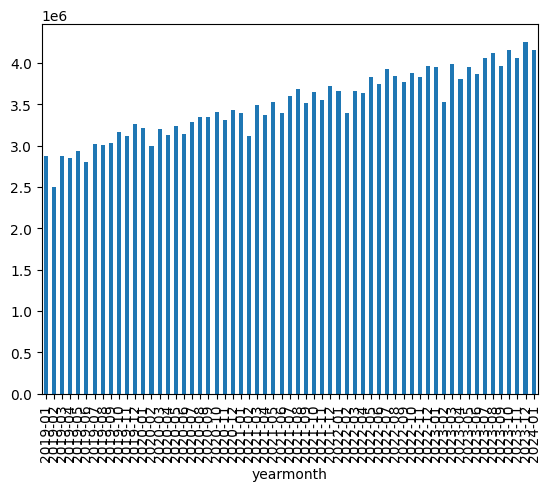

In [71]:
#Display of the bar plot of monthly sales
monyhly_sales_plot=monthly_sales.plot(kind='bar')

In [ ]:
#Display of the line chart of monthly orders
monthly_orders_plot=monthly_orders.plot(kind='line')

In [9]:
#Month with maximum sales
max_months=monthly_sales.idxmax()

#Maximum sales in a month
max_sales=monthly_sales.max()

#Month with the minimum sales
min_month=monthly_sales.idxmin()

#Minimum sales in a month
min_sales=monthly_sales.min()

print(max_months,max_sales,min_month,min_sales)

2023-12 4252535 2019-02 2502588


In [ ]:
#Sales of each cluster in a month
cluster_sales=df.groupby(['Clusters','yearmonth'])['Invoice-Value'].sum()

print(cluster_sales)

In [ ]:
#Plotting chart of cluster sales
cluster_sales_plot=cluster_sales.plot(kind='area',legend=bool)

#add labels and titles
mp.ylabel('sales')
mp.title('cluster sales over the months')

In [72]:
##Sales of each customer in a particular location
sales_by_location=df.groupby('Customer address')['Invoice-Value'].sum()

print(sales_by_location)

Customer address
Adarsh Nagar                   4655191
Ashok Vihar                    3178605
Bara Hindu Rao                 4584813
Bawana                         4235594
Burari                         4411548
Civil Lines                    5702574
Connaught Place                3176773
Darya Ganj                     5254679
Dwarka                         4771166
East of Kailash                4893657
Ghazipur                       3183174
Gokal Puri                     1710017
Greater Kailash                4533201
Green Park                     3151198
Hauz Khas                      3830785
Janakpuri                      4467916
Jor Bagh                       3838689
Kailash Colony                 4014736
Kalkaji                        4247547
Kamla Nagar                    5026470
Karawal Nagar                  4890612
Karol Bagh                     5780524
Malviya Nagar                  4308840
Mayur Vihar                    4136015
Mundka                         4389782
Najafgar

In [ ]:
#Revenue according to the payment method
sales_by_paymentmethod=df.groupby('Payment-Method')['Invoice-Value'].sum()

print(sales_by_paymentmethod)

In [ ]:
#Maximum orders in a store
max_orders_of_store=df.groupby('Store-ID')['Order-ID'].count()
print(max_orders_of_store.max())

In [ ]:
#Number of customers in zipcodes
customer_in_zipcode=df.groupby('zip codes')['Customer-ID'].count()

print(customer_in_zipcode)

In [ ]:

#Gives the descriptive statistics of the dataframe
desc_stats=df.describe()

print(desc_stats)

In [ ]:
#percentage change in the monthly sales 
growthrate=monthly_sales.pct_change()*100

print(growthrate)

In [ ]:
#Sum of Invoice value of customers
top_customer=df.groupby('Customer-ID')['Invoice-Value'].sum()

#Top 5 customers with highest sales value
print(top_customer.sort_values(ascending=False).head(5))

Customer-ID
N0048110042    70671
J0060110018    70250
R0093110011    70139
P0051110032    69355
K0018110019    69266
Name: Invoice-Value, dtype: int64


In [ ]:
#Sum of invoice value of different stores
top_stores=df.groupby('Store-ID')['Invoice-Value'].sum()

#Top 5 stores with highest sales
print(top_stores.sort_values(ascending=False).head(5))

Store-ID
90617110034    4404615
99146110018    4388757
33693110041    4383443
59338110025    4369609
20575110039    4368420
Name: Invoice-Value, dtype: int64


In [ ]:
#Average of orders received
avg_order=df['Invoice-Value'].mean()
print(avg_order)

504.97223057169566


In [ ]:
#Sales achieved by managers
sale_of_managers=df.groupby('Managers')['Invoice-Value'].sum()

print(sale_of_managers)

Managers
Aaliyah Chopra      3818342
Aanya Srinivasan    4315237
Aarav Sharma        3176773
Aarush Kumar        4655191
Aditya Khanna       4146963
Advait Mishra       4565402
Advaita Menon       4389782
Aisha Singh         4467916
Akshara Gupta       4893657
Ananya Verma        4584813
Anika Khurana       2582184
Anvi Nanda          1710017
Arjun Bansal        3856268
Arjun Singh         5702574
Arnav Reddy         4747436
Aryan Choudhury     4351243
Avni Sharma         4007107
Dev Patel           5008306
Diya Reddy          4960768
Esha Joshi          5355068
Ishita Das          4235594
Kabir Kapoor        4422886
Kabir Malhotra      3851655
Kavya Patel         5254679
Krish Nair          3151198
Kriti Patel         4411548
Maya Desai          4379064
Meera Agrawal       4247547
Naina Joshi         4237815
Natasha Sharma      4771166
Neha Bhatia         4395112
Neil Varma          4533201
Pooja Mehta         3830785
Pranav Iyer         5312498
Rishi Mehrotra      4308840
Riya Kapoor

In [ ]:

#correlation between zipcodes and sales
correlation=df['zip codes'].corr(df['Invoice-Value'])

print(correlation)

-0.0007692665202146542


In [73]:


#sales on membership dates
sm=df.groupby('Membership date')['Invoice-Value'].sum()
print(sm)

Membership date
1982-01-22    56968
1982-05-15    48153
1982-11-12    51088
1983-04-11    50668
1983-04-18    48541
              ...  
2024-01-09      396
2024-01-10      337
2024-01-13     1722
2024-01-17      196
2024-01-29      316
Name: Invoice-Value, Length: 3877, dtype: int64


In [74]:
## extract weekdays from the order date
df['weekdays']=df['Order-Date'].dt.weekday

#Sum of invoice value on weekdays
weekday_sales=df.groupby('weekdays')['Invoice-Value'].sum()

print(weekday_sales)


weekdays
0    30523388
1    30491114
2    30481236
3    30202535
4    30535045
5    30422187
6    30702837
Name: Invoice-Value, dtype: int64


In [ ]:
#create a plot of weekday sales
weekdays_plot=weekday_sales.plot(kind='line',ylabel='sales in Cr',title='Sales in the weekdays')

In [ ]:
df['Invoice-Value']=pd.to_numeric(df['Invoice-Value'])

In [ ]:
bins=[0,500,1000,10000]
group=['low purchasing power','moderate purchasing power','high purchasing power']
df['Invoice-Value']=pd.cut(df['Invoice-Value'],bins=bins,labels=group)
print(df)
